# ARIMA Time Series Analysis for Energy Demand Forcasting

by Christina Vavoulis and Julia Napolitano

### Definitions from US Energy Information Administration (EIA)
#### Primary energy
Energy in the form that it is first accounted for in a statistical energy balance, before any transformation to secondary or tertiary forms of energy. For example, coal can be converted to synthetic gas, which can be converted to electricity; in this example, coal is primary energy, synthetic gas is secondary energy, and electricity is tertiary energy. See Primary energy production and Primary energy consumption.
#### Primary energy consumption 
Consumption of primary energy. 
#### Primary energy production
Production of primary energy. 
#### Primary fuels
Fuels that can be used continuously. They can sustain the boiler sufficiently for the production of electricity.
##### source: https://www.eia.gov/opendata/qb.php?category=0
----------------------------------------------------------------------

This particular study analyzes the US total primary energy consumption. The script will work for predicitions of many different datasets within the EIA databases, including:
- List 
- EIA
- Series endings
- Here
- CA monthly generation:
     - series_id = ELEC.GEN.ALL-CA-99.M

### In command line interface
- pip install EIA-python
- pip install numpy
- pip install pandas
- pip install requests

In [52]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6
import numpy as np
import pandas as pd
import requests
from config import api_key
import eia
import datetime
import re
from sqlalchemy import create_engine
from datetime import datetime

#### Part One: Import All Data

In [53]:
# test if api_key variable works
# (remove this line output when making public)
api_key

'021bf1d89256205c8528b6d4475485b3'

In [54]:
# save variable to call in api data w/ key
api = eia.API(api_key)

In [55]:
# save all relevant api endings as an iterable object
series = ['TOTAL.TEICBUS.M','TOTAL.TERCBUS.M','TOTAL.TEACBUS.M','TOTAL.TXCCBUS.M','TOTAL.TXEIBUS.M','TOTAL.TXICBUS.M','TOTAL.TXRCBUS.M','TOTAL.TXACBUS.M','TOTAL.TETCBUS.M']


In [56]:
# test one api ending; import to pandas dataframe
test_import = api.data_by_series(series='TOTAL.TECCBUS.M')
eia_df = pd.DataFrame(test_import)
eia_df.head()


,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)"
1973 01,1079.310
1973 02,1001.920
1973 03,884.437
1973 04,735.461
1973 05,696.114


In [57]:
# iterate through api endings and save to above dataframe
for x in series:
    series_search = api.data_by_series(series=x)
    df = pd.DataFrame(series_search)
    eia_df = eia_df.join(df, how="outer")


In [58]:
# print all data in df
eia_df.tail()

,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
2018 05,1435.837,2747.383,1378.514,2462.406,253.900,3128.758,1892.474,292.806,2456.202,8021.157
2018 06,1474.673,2679.517,1562.457,2431.309,228.150,3416.029,1843.755,235.152,2424.870,8149.256
2018 07,1556.004,2761.916,1782.894,2501.553,223.335,3762.883,1895.952,225.157,2495.040,8606.516
2018 08,1559.876,2871.840,1729.648,2545.495,227.456,3733.591,1991.439,215.682,2538.692,8707.549
2018 09,1422.358,2648.561,1488.834,2313.560,230.369,3253.682,1852.436,229.623,2307.205,7870.618


In [59]:
# create numeric index (unique identifier)
eia_df = eia_df.reset_index()
eia_df = eia_df.rename(columns={"index":"Time"})
eia_df.head()

,Time,"Total Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Commercial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Electric Power Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Industrial Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Residential Sector, Monthly (Trillion Btu)","Total Primary Energy Consumed by the Transportation Sector, Monthly (Trillion Btu)","Total Primary Energy Consumption, Monthly (Trillion Btu)"
0,1973 01,1079.310,2701.524,1932.187,1509.552,656.607,1691.096,2054.675,1313.816,1506.380,7226.265
1,1973 02,1001.920,2460.752,1687.255,1442.127,621.766,1511.458,1869.459,1150.011,1439.361,6594.709
2,1973 03,884.437,2579.613,1497.067,1564.016,490.154,1559.159,1944.295,970.362,1561.162,6524.198
3,1973 04,735.461,2550.210,1177.661,1482.632,362.003,1470.152,1924.207,709.631,1479.971,5944.336
4,1973 05,696.114,2741.810,1015.008,1624.436,289.109,1551.631,2070.447,544.596,1621.585,6074.551


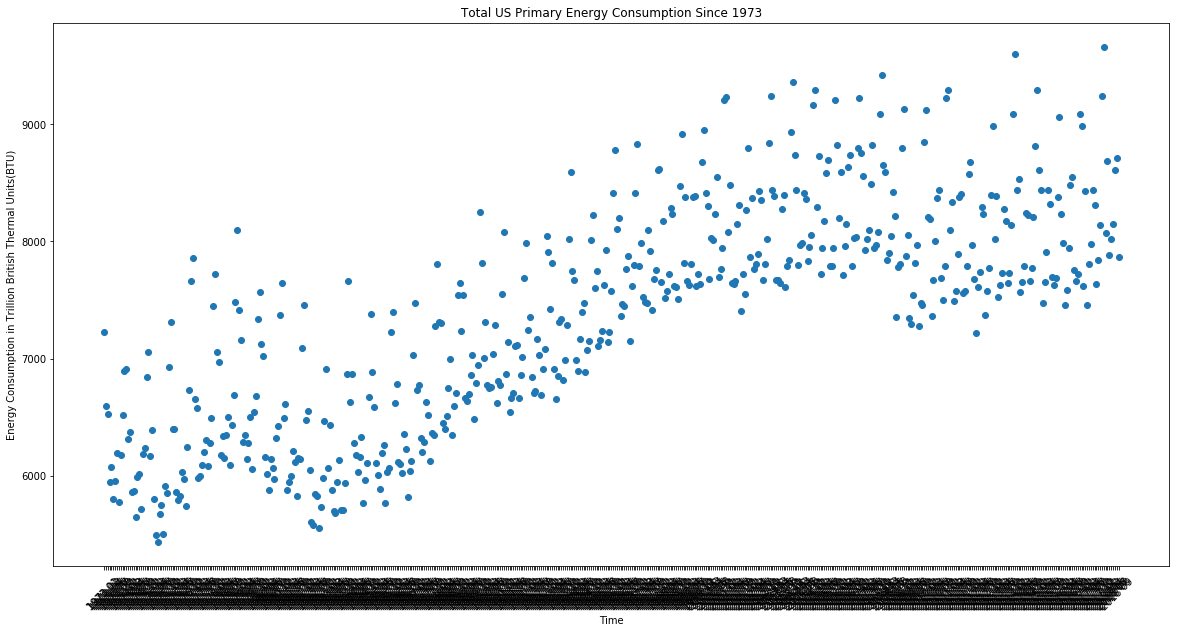

In [9]:
# scatter plot of total US consumption by month

plt.figure(figsize=(20,10))
plt.title("Total US Primary Energy Consumption Since 1973")
plt.xlabel("Time")
plt.ylabel("Energy Consumption in Trillion British Thermal Units(BTU)")
plt.xticks(rotation=45)
plt.scatter(eia_df['Time'], eia_df['Total Primary Energy Consumption, Monthly (Trillion Btu)'], )



#### Part Two: Reshape data for analysis

In [60]:
# new dataframe with just datestamp and total usage. Adjust here to test of different datasets.
total_monthly_df = eia_df[["Time", "Total Primary Energy Consumption, Monthly (Trillion Btu)"]]
total_monthly_df.head()

# time column still needs to be converted to datetime for time series analysis

,Time,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
0,1973 01,7226.265
1,1973 02,6594.709
2,1973 03,6524.198
3,1973 04,5944.336
4,1973 05,6074.551


In [61]:
# create object for existing timestamp column and an empty list for converted timestamp
timestamp = total_monthly_df["Time"]
datetime_list = []

In [62]:
# fill empty list with dates converted to datetime
for i in timestamp:
    i = i.replace(" ", "-")
    i = i + "01"
    i = pd.to_datetime(i, infer_datetime_format = True)
    datetime_list.append(i)

In [63]:
datetime_list[:10]

[Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00')]

In [64]:
# convert to array so it can be added to pandas df
datetime_array = np.asarray(datetime_list)
datetime_array[:10]

array([Timestamp('1973-01-01 00:00:00'), Timestamp('1973-02-01 00:00:00'),
       Timestamp('1973-03-01 00:00:00'), Timestamp('1973-04-01 00:00:00'),
       Timestamp('1973-05-01 00:00:00'), Timestamp('1973-06-01 00:00:00'),
       Timestamp('1973-07-01 00:00:00'), Timestamp('1973-08-01 00:00:00'),
       Timestamp('1973-09-01 00:00:00'), Timestamp('1973-10-01 00:00:00')],
      dtype=object)

In [65]:
# make sure this is 549
len(datetime_array)

549

In [66]:
# add datetime array to total consumption df
total_monthly_df['Date'] = datetime_array
total_monthly_df.head()

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Time,"Total Primary Energy Consumption, Monthly (Trillion Btu)",Date
0,1973 01,7226.265,1973-01-01
1,1973 02,6594.709,1973-02-01
2,1973 03,6524.198,1973-03-01
3,1973 04,5944.336,1973-04-01
4,1973 05,6074.551,1973-05-01


In [67]:
# new dataframe with just datetime(as index) and usage columns
raw_df = total_monthly_df[["Date", "Total Primary Energy Consumption, Monthly (Trillion Btu)"]]
raw_df = raw_df.set_index("Date")
raw_df.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
1973-01-01,7226.265
1973-02-01,6594.709
1973-03-01,6524.198
1973-04-01,5944.336
1973-05-01,6074.551


# Start time series testing here

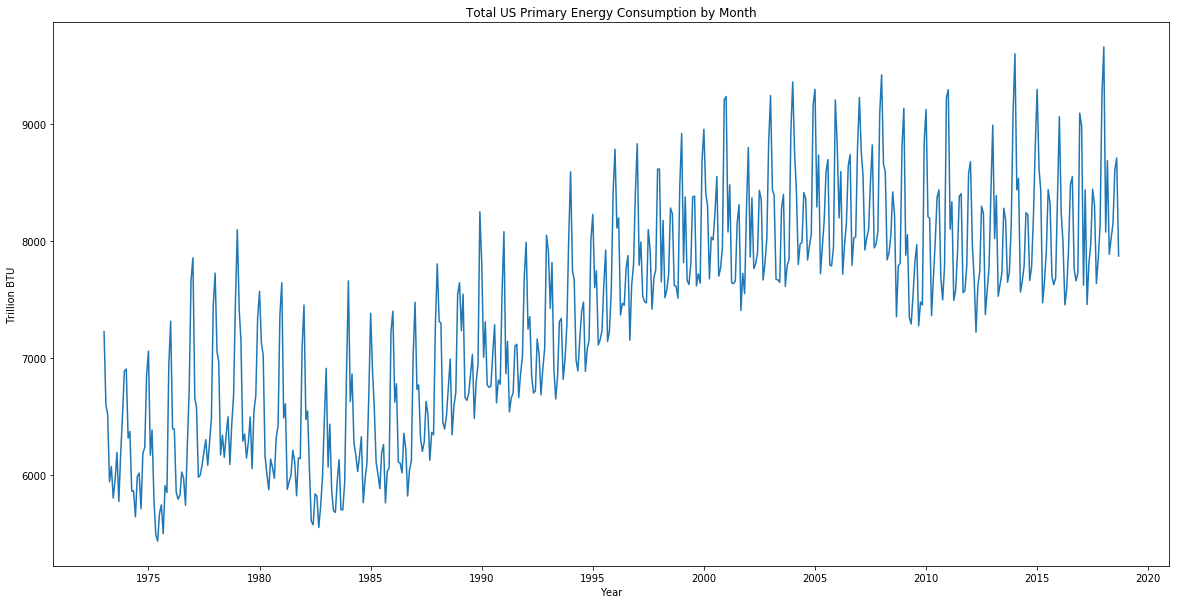

In [68]:
# raw data line plot
plt.figure(figsize=(20,10))
plt.title("Total US Primary Energy Consumption by Month")
plt.xlabel("Year")
plt.ylabel("Trillion BTU")
plt.plot(raw_df)

##  Test stationarity
### If mean is not constant, data is not stationary. Scale the data in various ways to figure out the best way to achieve stationarity.
#### We test for stationarity in two ways: a visual test and a statistical test
- VISUAL TEST: plot rolling mean and stdev for a visual of whether data is stationary
    - if data is stationary, it the mean should be close to a straight line with no slope
- STATS TEST: run Dickey-Fuller test for statistical confirmation of whether data is stationary
    - if data is stationary, the P-value should be < 0.05 and the absolute value of the Test Statistic should be greater than the absolute value of the Critical Value

In [69]:
# create function to create rolling mean and stdev, plot for visual test, and DF for stat test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determine rolling stats
    movingAverage=timeseries.rolling(window=12).mean()
    movingStd=timeseries.rolling(window=12).std()
    
    #plot rolling stats
    orig=plt.plot(timeseries, color="blue", label="Original")
    mean=plt.plot(movingAverage, color="red", label="Rolling Mean")
    std=plt.plot(movingStd, color="black", label="Rolling STD")
    plt.legend(loc="best")
    plt.title("Rolling Mean and STD")
    plt.show(block=False)
     
    #perform Dickey-Fuller test
    print("Results of Dickey Fuller test:")
    dftest = adfuller(timeseries["Total Primary Energy Consumption, Monthly (Trillion Btu)"], autolag = 'AIC')
    dfoutput=pd.Series(dftest[0:4], index=["Test Statistic", "P-Value",'# Lags Used',"# of Obsv Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)
    

### Run this function on scaled data:

#### https://otexts.com/fpp2/stationarity.html
- Raw data (for baseline)
- Log scale
- Log scale minus moving average
- Differencing:
    - on Log scale
    - on Log scale minus moving average
- Exponential weighting
- Differencing (log scale) + Exponential weighting
- Seasonal Decomposition

This shows one way to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing.

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

As well as looking at the time plot of the data, the ACF plot is also useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of r1 is often large and positive.

### Test with raw data

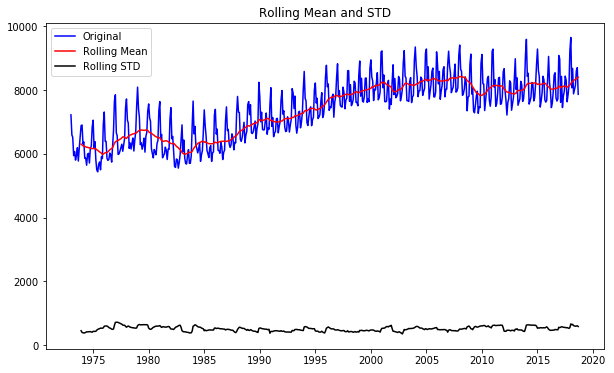

Results of Dickey Fuller test:
Test Statistic           -0.995665
P-Value                   0.754842
# Lags Used              14.000000
# of Obsv Used          534.000000
Critical Value (1%)      -3.442655
Critical Value (5%)      -2.866968
Critical Value (10%)     -2.569661
dtype: float64


In [70]:
# this is how we know the raw data is not stationary

test_stationarity(raw_df)

## Test with raw data - moving average

In [71]:
# reset moving average
movingAverage=raw_df.rolling(window=12).mean()
movingAverage.tail()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
2018-05-01,8324.941583
2018-06-01,8339.553917
2018-07-01,8353.290417
2018-08-01,8386.595917
2018-09-01,8406.083583


In [72]:
# create df of (raw data - moving avg)
rawMinusMovingAverage_df = raw_df - movingAverage
rawMinusMovingAverage_df.dropna(inplace=True)
rawMinusMovingAverage_df.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
1973-12-01,582.757667
1974-01-01,626.393500
1974-02-01,59.772083
1974-03-01,129.214000
1974-04-01,-374.176083


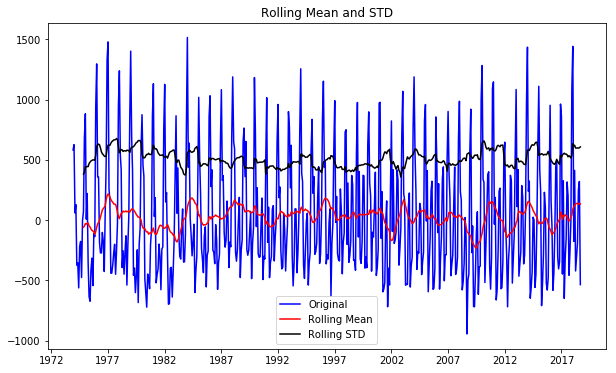

Results of Dickey Fuller test:
Test Statistic         -6.505259e+00
P-Value                 1.135368e-08
# Lags Used             1.700000e+01
# of Obsv Used          5.200000e+02
Critical Value (1%)    -3.442988e+00
Critical Value (5%)    -2.867114e+00
Critical Value (10%)   -2.569739e+00
dtype: float64


In [73]:
test_stationarity(rawMinusMovingAverage_df)

# the raw data looks somewhat stationary but has good Dickey-Fuller results

### Test with a log scale

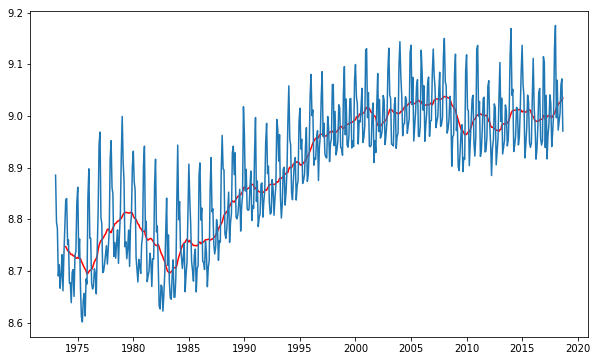

In [74]:
# create new df with log scaled data
raw_df_logScale=np.log(raw_df)

#create a rolling mean of log scaled data
raw_df_log_smooth = raw_df_logScale.rolling(window = 12).mean()

#plot both
plt.plot(raw_df_log_smooth, color = 'red')
plt.plot(raw_df_logScale)
plt.show()

# this data does not appear stationary
# sometimes it is easier to visualize without the stdev because the y-scale adjusts

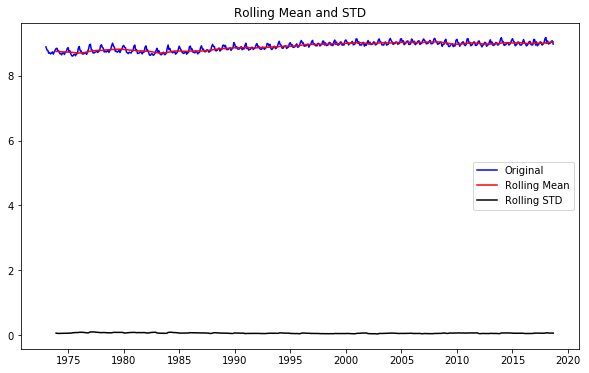

Results of Dickey Fuller test:
Test Statistic           -1.133286
P-Value                   0.701617
# Lags Used              18.000000
# of Obsv Used          530.000000
Critical Value (1%)      -3.442749
Critical Value (5%)      -2.867009
Critical Value (10%)     -2.569683
dtype: float64


In [75]:
test_stationarity(raw_df_logScale)
# DF confirms this data is not stationary

## Test with log scale minus moving average

In [76]:
# reset rolling mean and stdev of log scaled data
movingAverage = raw_df_logScale.rolling(window=12).mean()
movingStd = raw_df_logScale.rolling(window=12).std()

# create df of Log - Moving Avg
logScaleMinusMovingAverage_df = raw_df_logScale - movingAverage
logScaleMinusMovingAverage_df.dropna(inplace=True)
logScaleMinusMovingAverage_df.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
1973-12-01,0.090658
1974-01-01,0.096893
1974-02-01,0.011220
1974-03-01,0.022133
1974-04-01,-0.060145


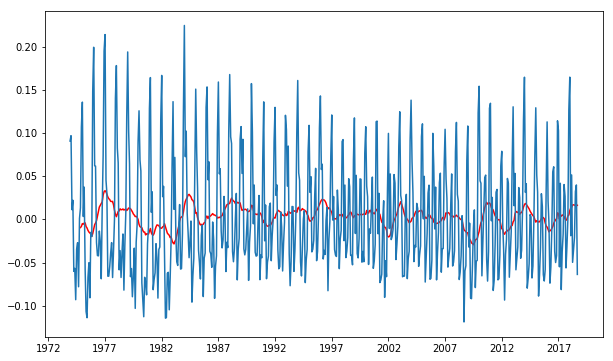

In [77]:
# reset rolling mean of Log - Moving Avg 
movingAverage = logScaleMinusMovingAverage_df.rolling(window=12).mean()

# plot both
plt.plot(movingAverage, color = 'red')
plt.plot(logScaleMinusMovingAverage_df)
plt.show()

# this data appears stationary

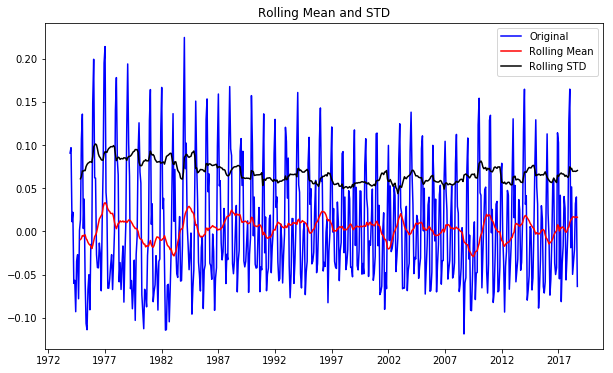

Results of Dickey Fuller test:
Test Statistic         -6.520068e+00
P-Value                 1.047558e-08
# Lags Used             1.700000e+01
# of Obsv Used          5.200000e+02
Critical Value (1%)    -3.442988e+00
Critical Value (5%)    -2.867114e+00
Critical Value (10%)   -2.569739e+00
dtype: float64


In [78]:
test_stationarity(logScaleMinusMovingAverage_df)

# DF confirms this data is stationary
# this one is the best P-value so far

## Test with exponential weighted average

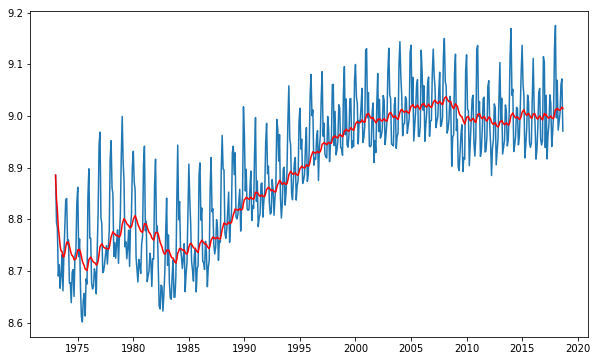

In [79]:

expwighted_avg = raw_df_logScale.ewm(halflife=12).mean()
plt.plot(raw_df_logScale)
plt.plot(expwighted_avg, color='red')

# this data does not appear stationary

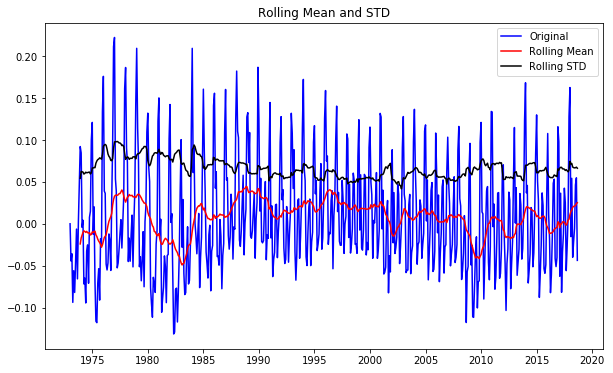

Results of Dickey Fuller test:
Test Statistic           -4.374638
P-Value                   0.000329
# Lags Used              17.000000
# of Obsv Used          531.000000
Critical Value (1%)      -3.442725
Critical Value (5%)      -2.866998
Critical Value (10%)     -2.569677
dtype: float64


In [80]:
exp_ts_diff = raw_df_logScale-expwighted_avg
test_stationarity(exp_ts_diff)

# DF confirms this data actually is stationary, but with less confidence than the logscale model

## Test with differencing and log scale

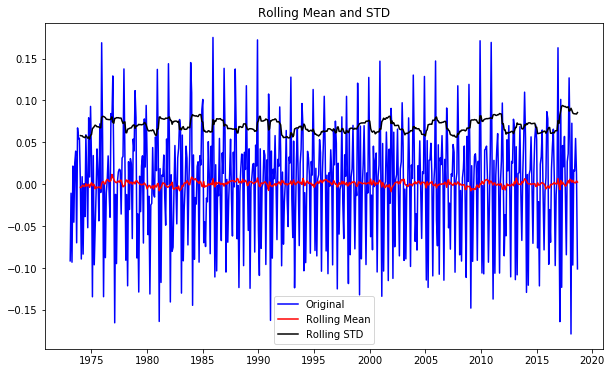

Results of Dickey Fuller test:
Test Statistic           -5.467416
P-Value                   0.000002
# Lags Used              17.000000
# of Obsv Used          530.000000
Critical Value (1%)      -3.442749
Critical Value (5%)      -2.867009
Critical Value (10%)     -2.569683
dtype: float64


In [81]:

raw_df_diff = raw_df_logScale - raw_df_logScale.shift()
raw_df_diff.dropna(inplace = True)

test_stationarity(raw_df_diff)

## Test with differencing and log scale - moving average

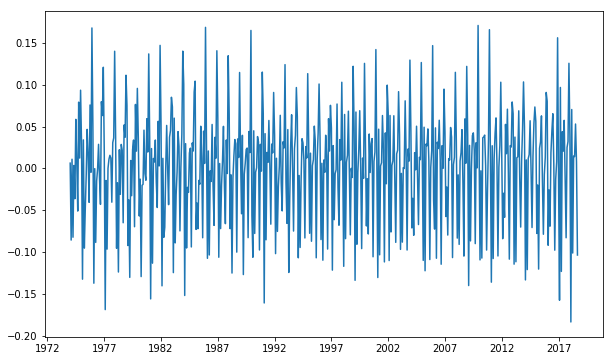

In [82]:
logScaleMinusMovingAverage_shift = logScaleMinusMovingAverage_df - logScaleMinusMovingAverage_df.shift()
plt.plot(logScaleMinusMovingAverage_shift)



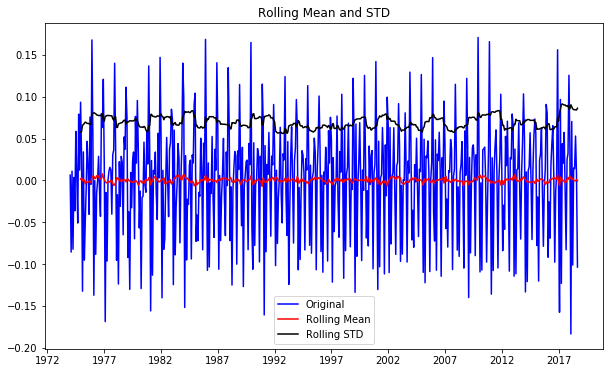

Results of Dickey Fuller test:
Test Statistic         -7.393763e+00
P-Value                 7.875806e-11
# Lags Used             1.700000e+01
# of Obsv Used          5.190000e+02
Critical Value (1%)    -3.443013e+00
Critical Value (5%)    -2.867125e+00
Critical Value (10%)   -2.569745e+00
dtype: float64


In [83]:
logScaleMinusMovingAverage_shift.dropna(inplace=True)
test_stationarity(logScaleMinusMovingAverage_shift)

# this has our new lowest P-value so far

## Test with differencing exponential weighting

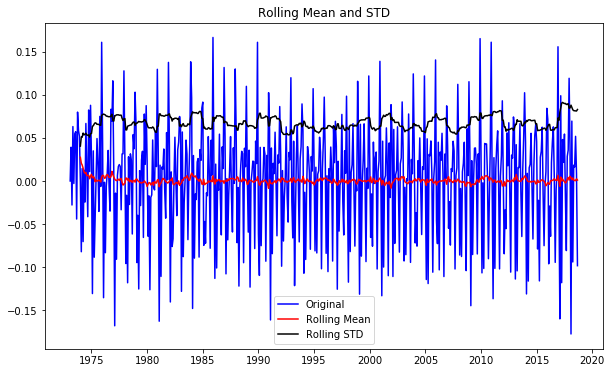

Results of Dickey Fuller test:
Test Statistic         -6.622722e+00
P-Value                 5.980849e-09
# Lags Used             1.600000e+01
# of Obsv Used          5.310000e+02
Critical Value (1%)    -3.442725e+00
Critical Value (5%)    -2.866998e+00
Critical Value (10%)   -2.569677e+00
dtype: float64


In [84]:

raw_df_diff_exp = raw_df_diff  - raw_df_diff.ewm(halflife = 12).mean()
raw_df_diff_exp.dropna(inplace = True)
test_stationarity(raw_df_diff_exp)

# this one is not as low of differencing + (log scale - moving average)

## Test with Seasonal Decomposition

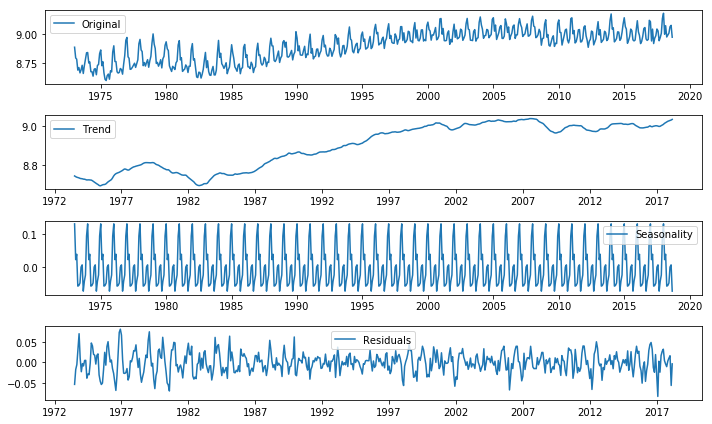

In [87]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(raw_df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(raw_df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



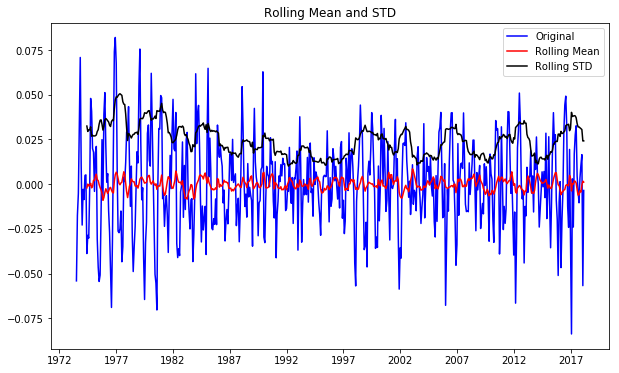

Results of Dickey Fuller test:
Test Statistic         -1.600513e+01
P-Value                 6.446769e-29
# Lags Used             9.000000e+00
# of Obsv Used          5.270000e+02
Critical Value (1%)    -3.442820e+00
Critical Value (5%)    -2.867040e+00
Critical Value (10%)   -2.569699e+00
dtype: float64


In [88]:
# test stationarity on residual plot after trend and seasonality has been removed 

raw_df_log_decompose = residual
raw_df_log_decompose.dropna(inplace=True)
test_stationarity(raw_df_log_decompose)

# DF shows this is by far the highest confidence model

# Begin forecasting here

### rephrase this explanation!!

Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

#### Selecting p, q, and d values

1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

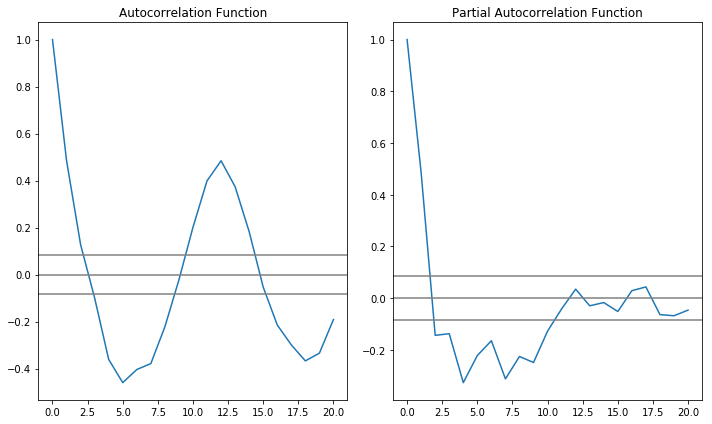

In [89]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(raw_df_log_decompose, nlags=20)
lag_pacf = pacf(raw_df_log_decompose, nlags=20, method = 'ols')
#ols is 'ordinary least squares' method

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.axhline(y=1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='-', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.axhline(y=1.96/np.sqrt(len(raw_df_log_decompose)), linestyle='-', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


In [90]:
raw_df_log_decompose.head()

,"Total Primary Energy Consumption, Monthly (Trillion Btu)"
Date,
1973-07-01,-0.054047
1973-08-01,-0.017516
1973-09-01,-0.005211
1973-10-01,0.033536
1973-11-01,0.070825


/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


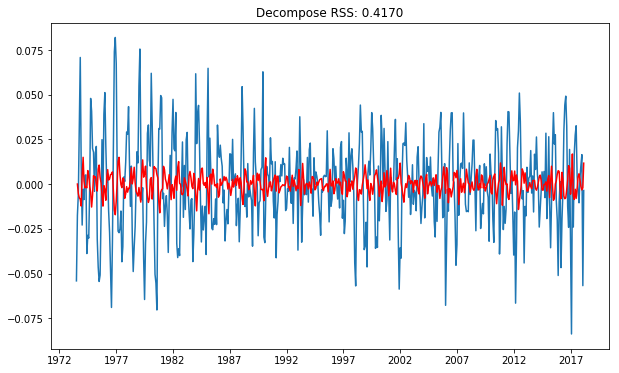

In [91]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(raw_df_log_decompose, order=(2, 1, 0))
results_AR = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
result = (results_AR.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
result.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(result))
print('Plotting AR model')

/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


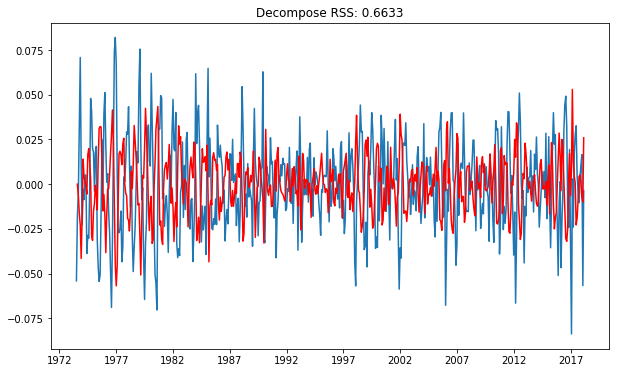

In [92]:
#MA MODEL
model = ARIMA(raw_df_log_decompose, order=(0, 1, 2))
results_MA = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_MA.fittedvalues, color='red')
result = (results_MA.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
result.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(result))
print('Plotting MA model')


/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/julia/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


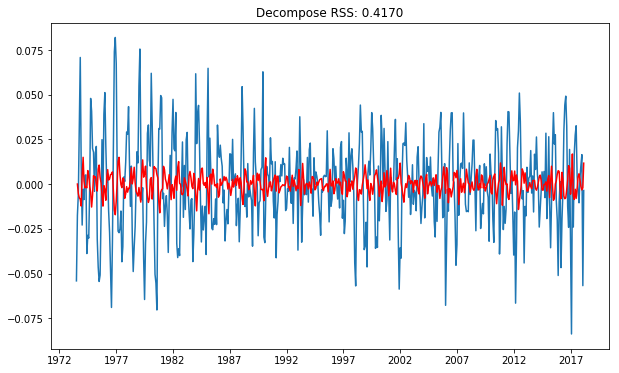

In [93]:
#ARIMA MODEL
model = ARIMA(raw_df_log_decompose, order=(2, 1, 0))
results_ARIMA = model.fit(disp=-1)
plt.plot(raw_df_log_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
result = (results_ARIMA.fittedvalues-raw_df_log_decompose["Total Primary Energy Consumption, Monthly (Trillion Btu)"])**2
result.dropna(inplace=True)
plt.title('Decompose RSS: %.4f'% sum(result))
print('Plotting ARIMA model')



In [94]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

Date
1973-08-01    0.000066
1973-09-01   -0.005365
1973-10-01   -0.007604
1973-11-01   -0.008444
1973-12-01   -0.012232
dtype: float64

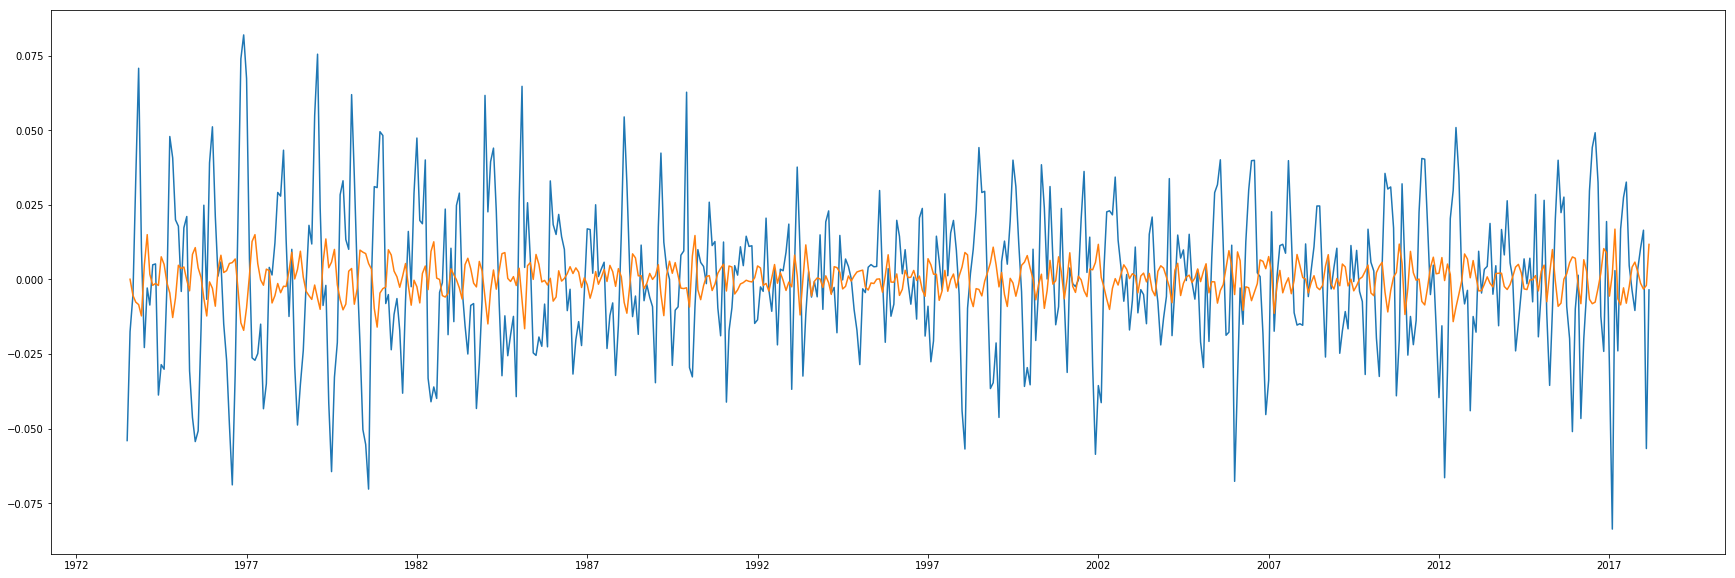

In [95]:
plt.figure(figsize=(30,10))
plt.plot(residual)
plt.plot(predictions_ARIMA_diff)


In [96]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()


Date
1973-08-01    0.000066
1973-09-01   -0.005298
1973-10-01   -0.012902
1973-11-01   -0.021346
1973-12-01   -0.033577
dtype: float64

In [97]:
predictions_ARIMA_log = pd.Series(raw_df_log_decompose.iloc[0], index=raw_df_log_decompose.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.dropna(inplace=True)
predictions_ARIMA_log.head()

Date
1973-08-01    0.000066
1973-09-01   -0.005298
1973-10-01   -0.012902
1973-11-01   -0.021346
1973-12-01   -0.033577
dtype: float64

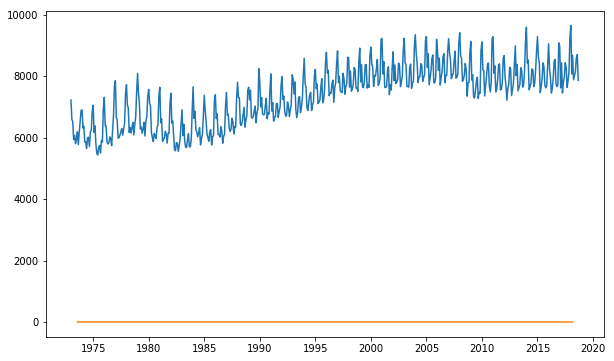

In [98]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(raw_df)
plt.plot(predictions_ARIMA)

## From here we need to revert the equation used to normalize the raw_df_log_decompose series

# Questions
## How do we know what p, q, d values to choose?
## How do we revert the seasonal decomposition? 
## and then revert the log of the results?
## how do we predict future values?
## how do we explain the ACF and PACF tests? What do those mean?
## how do we extract a y=mx+b formula from the seasonal decomposition components? 